# Import libraries


In [2]:
## import libraries

#PyTorch 

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as torch_optim
from torchvision import models
from torch.nn import init
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils import data
from torch.optim import lr_scheduler

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


#other
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
import math 
from google.colab import files
import io
import datetime as dt
import re
import pandas_profiling
import pandas_profiling as pp
from math import sqrt

#graphs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import pylab as plt
import matplotlib.dates as dates
import seaborn as sns
import pylab
import matplotlib
import matplotlib.dates
from IPython.display import display
import plotly.graph_objects as go


%matplotlib inline

In [3]:
import pandas as pd

In [ ]:
# load tqdm
#!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
from tqdm import tqdm, tqdm_notebook, tnrange

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Help Functions

In [ ]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

# Read from Kaggle

In [1]:
!pip install kaggle

In [2]:
cd /root/

/root


In [3]:
!mkdir .kaggle

In [4]:
cd /root/.kaggle

/root/.kaggle


In [5]:
import json
token = {"username":"rridhijain","key":"12722489288ce3cf875d92e6deff9687"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [6]:
!cp /root/.kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: '/root/.kaggle/kaggle.json' and '/root/.kaggle/kaggle.json' are the same file


In [7]:
!kaggle config set -n path -v{/root}

- path is now set to: {/root}


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction -p /root/new-york-city-taxi

  0% 0.00/486 [00:00<?, ?B/s]
100% 486/486 [00:00<00:00, 783kB/s]
  0% 0.00/335k [00:00<?, ?B/s]
100% 335k/335k [00:00<00:00, 104MB/s]
 99% 1.55G/1.56G [00:07<00:00, 172MB/s]
100% 1.56G/1.56G [00:07<00:00, 213MB/s]
  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 131MB/s]


In [10]:
cd /root/new-york-city-taxi


/root/new-york-city-taxi


In [11]:
!unzip /root/new-york-city-taxi/*.zip

Archive:  /root/new-york-city-taxi/train.csv.zip
  inflating: train.csv               


In [10]:
cd /root/new-york-city-taxi/

/root/new-york-city-taxi


In [11]:
ls -a

./   GCP-Coupons-Instructions.rtf  test.csv   train.csv.zip
../  sample_submission.csv         train.csv


# Upload Data

In [16]:
traindf = pd.read_csv("/root/new-york-city-taxi/test.csv")

In [17]:
traindf.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [18]:
# upload df_Test csv file
df_test = pd.read_csv("/root/new-york-city-taxi/test.csv")
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


# Data preprocessing

## Stacking train and test set so that they undergo the same preprocessing

In [ ]:
# copy for subbmision

df_test_for_sub = df_test['key']
df_test_for_sub

0       2015-01-27 13:08:24.0000002
1       2015-01-27 13:08:24.0000003
2       2011-10-08 11:53:44.0000002
3       2012-12-01 21:12:12.0000002
4       2012-12-01 21:12:12.0000003
                   ...             
9909    2015-05-10 12:37:51.0000002
9910    2015-01-12 17:05:51.0000001
9911    2015-04-19 20:44:15.0000001
9912    2015-01-31 01:05:19.0000005
9913    2015-01-18 14:06:23.0000006
Name: key, Length: 9914, dtype: object

In [ ]:
# delete the fares that are less than 0
df_train = df_train.loc[df_train.fare_amount > 0]
df_train.fare_amount.min()

0.01

In [ ]:
len(df_train)

99990

In [ ]:
train_X = df_train.drop(columns=['fare_amount'])
Y = np.log(df_train.fare_amount)

#Y = df_train['fare_amount']
test_X = df_test


In [ ]:
df = train_X.append(test_X,sort=False)

##Calculate the distance traveled

In [ ]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,0.0,00:00.0,2013-01-02 21:00:00 UTC,-73.974270,40.756035,-73.968990,40.785887,1,3.349038
1,1.0,36:26.0,2009-04-06 09:36:26 UTC,-74.015830,40.711327,-73.980663,40.744378,1,4.721006
2,2.0,00:37.0,2011-01-22 20:00:37 UTC,-73.977800,40.725955,-73.988308,40.749000,3,2.711117
3,3.0,28:00.0,2010-08-08 19:28:00 UTC,-73.986797,40.756503,-73.954817,40.777915,1,3.594734
4,4.0,39:19.0,2011-02-03 07:39:19 UTC,-73.984237,40.765598,-73.987143,40.736413,1,3.254443


##Add a datetime column and derive useful statistics

In [ ]:
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,0.0,00:00.0,2013-01-02 21:00:00 UTC,-73.974270,40.756035,-73.968990,40.785887,1,3.349038,2013-01-02 17:00:00,17,pm,Wed
1,1.0,36:26.0,2009-04-06 09:36:26 UTC,-74.015830,40.711327,-73.980663,40.744378,1,4.721006,2009-04-06 05:36:26,5,am,Mon
2,2.0,00:37.0,2011-01-22 20:00:37 UTC,-73.977800,40.725955,-73.988308,40.749000,3,2.711117,2011-01-22 16:00:37,16,pm,Sat
3,3.0,28:00.0,2010-08-08 19:28:00 UTC,-73.986797,40.756503,-73.954817,40.777915,1,3.594734,2010-08-08 15:28:00,15,pm,Sun
4,4.0,39:19.0,2011-02-03 07:39:19 UTC,-73.984237,40.765598,-73.987143,40.736413,1,3.254443,2011-02-03 03:39:19,3,am,Thu


# Prepare the model

## define Categorical and continuous columns

In [ ]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']


In [ ]:
#df.head()
#df.info()

In [ ]:
#make the cat categories as "category" and label encoder it.
for col in df.columns:
  if col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
    df[col]= df[col].astype('category')



In [ ]:
df.head()

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,0.0,00:00.0,2013-01-02 21:00:00 UTC,-73.974270,40.756035,-73.968990,40.785887,1,3.349038,2013-01-02 17:00:00,17,1,6
1,1.0,36:26.0,2009-04-06 09:36:26 UTC,-74.015830,40.711327,-73.980663,40.744378,1,4.721006,2009-04-06 05:36:26,5,0,1
2,2.0,00:37.0,2011-01-22 20:00:37 UTC,-73.977800,40.725955,-73.988308,40.749000,3,2.711117,2011-01-22 16:00:37,16,1,2
3,3.0,28:00.0,2010-08-08 19:28:00 UTC,-73.986797,40.756503,-73.954817,40.777915,1,3.594734,2010-08-08 15:28:00,15,1,3
4,4.0,39:19.0,2011-02-03 07:39:19 UTC,-73.984237,40.765598,-73.987143,40.736413,1,3.254443,2011-02-03 03:39:19,3,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109904 entries, 0 to 9913
Data columns (total 13 columns):
Unnamed: 0           99990 non-null float64
key                  109904 non-null object
pickup_datetime      109904 non-null object
pickup_longitude     109904 non-null float64
pickup_latitude      109904 non-null float64
dropoff_longitude    109904 non-null float64
dropoff_latitude     109904 non-null float64
passenger_count      109904 non-null int64
dist_km              109904 non-null float64
EDTdate              109904 non-null datetime64[ns]
Hour                 109904 non-null category
AMorPM               109904 non-null category
Weekday              109904 non-null category
dtypes: category(3), datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 9.5+ MB


##Take the relevent columns for the Model and Split back to train and test

In [ ]:
df.columns

Index(['Unnamed: 0', 'key', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [ ]:
# keep only the cols for the model
df = df[['Hour', 'AMorPM', 'Weekday','pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']]

In [ ]:
df_train = df[:99990]
df_test = df[99990:]

##Continuous values

In [ ]:
#Normalizing 

from pandas.api.types import is_numeric_dtype

#"Compute the means and stds of `self.cont_names` columns to normalize them."
def Normalize(df):
  means,stds = {},{}
  cont_names = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
  for n in cont_names:
    assert is_numeric_dtype(df[n]), (f"""Cannot normalize '{n}' column as it isn't numerical. Are you sure it doesn't belong in the categorical set of columns?""")
    means[n],stds[n] = df[n].mean(),df[n].std()
    df[n] = (df[n]-means[n]) / (1e-7 + stds[n])


Normalize(df_train)
Normalize(df_test)
X = df_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_train.head()

,Hour,AMorPM,Weekday,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,dist_km
0,17,1,6,0.063325,-0.105675,0.059963,-0.103717,-0.526090,-0.041797
1,5,0,1,0.059902,-0.108589,0.057104,-0.104555,-0.526090,-0.037805
2,16,1,2,0.061022,-0.105923,0.057423,-0.105105,0.996626,-0.043653
3,15,1,3,0.063361,-0.106553,0.059414,-0.102698,-0.526090,-0.041082
4,3,0,4,0.064058,-0.106374,0.056556,-0.105021,-0.526090,-0.042072


In [ ]:
X.shape

(99990, 9)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 9 columns):
Hour                 99990 non-null category
AMorPM               99990 non-null category
Weekday              99990 non-null category
pickup_latitude      99990 non-null float64
pickup_longitude     99990 non-null float64
dropoff_latitude     99990 non-null float64
dropoff_longitude    99990 non-null float64
passenger_count      99990 non-null float64
dist_km              99990 non-null float64
dtypes: category(3), float64(6)
memory usage: 5.6 MB


## train-valid split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, random_state=42,shuffle=True ) 
X_train.head()

,Hour,AMorPM,Weekday,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,dist_km
58528,3,0,5,0.054532,-0.092567,0.053360,-0.105123,-0.526090,0.000312
38244,15,1,6,0.063374,-0.104986,0.058639,-0.104457,-0.526090,-0.046671
3806,11,0,2,0.062391,-0.107446,0.055513,-0.106662,-0.526090,-0.043807
27927,15,1,4,0.064137,-0.105959,0.059360,-0.105151,2.519342,-0.047260
6006,9,0,0,0.063754,-0.107077,0.058307,-0.105548,-0.526090,-0.051457


## Embeddings

In [ ]:
#df.info()
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [ ]:
type(emb_szs)

list

In [ ]:
X_train.shape


(79992, 9)

In [ ]:
X_val.shape

(19998, 9)

In [ ]:
y_train.shape

(79992,)

In [ ]:
y_val.shape

(19998,)

#Model

##Pytorch data set datasets and dataloaders

In [ ]:
class RegressionColumnarDataset(data.Dataset):
    def __init__(self, df, cats, y):
        
        
        self.dfcats = df[cats] #type: pandas.core.frame.DataFrame
        self.dfconts = df.drop(cats, axis=1) #type: pandas.core.frame.DataFrame
        
        
        self.cats = np.stack([c.values for n, c in self.dfcats.items()], axis=1).astype(np.int64) #tpye: numpy.ndarray
        self.conts = np.stack([c.values for n, c in self.dfconts.items()], axis=1).astype(np.float32) #tpye: numpy.ndarray
        self.y = y.values.astype(np.float32)
        
        
    def __len__(self): return len(self.y)

    def __getitem__(self, idx):
        
        return [self.cats[idx], self.conts[idx], self.y[idx]]
        
        

In [ ]:
trainds = RegressionColumnarDataset(X_train, cat_cols, y_train) #type: __main__.RegressionColumnarDataset
valds = RegressionColumnarDataset(X_val, cat_cols, y_val) #type: __main__.RegressionColumnarDataset

In [ ]:
params = {'batch_size': 128,
          'shuffle': True}


traindl = DataLoader(trainds, **params) #type: torch.utils.data.dataloader.DataLoader
valdl = DataLoader(valds, **params) #type: torch.utils.data.dataloader.DataLoader

##Tabular Model

In [ ]:
# help functions

from collections.abc import Iterable


def bn_drop_lin(n_in:int, n_out:int, bn:bool=True, p:float=0., actn=None):
    "Sequence of batchnorm (if `bn`), dropout (with `p`) and linear (`n_in`,`n_out`) layers followed by `actn`."
    layers = [nn.BatchNorm1d(n_in)] if bn else []
    if p != 0: layers.append(nn.Dropout(p))
    layers.append(nn.Linear(n_in, n_out))
    if actn is not None: layers.append(actn)
    return layers

def ifnone(a,b):
    "`a` if `a` is not None, otherwise `b`."
    return b if a is None else a

def listify(p, q):
    "Make `p` listy and the same length as `q`."
    if p is None: p=[]
    elif isinstance(p, str):          p = [p]
    elif not isinstance(p, Iterable): p = [p]
    #Rank 0 tensors in PyTorch are Iterable but don't have a length.
    else:
        try: a = len(p)
        except: p = [p]
    n = q if type(q)==int else len(p) if q is None else len(q)
    if len(p)==1: p = p * n
    assert len(p)==n, f'List len mismatch ({len(p)} vs {n})'
    return list(p)

              

class TabularModel(nn.Module):
    "Basic model for tabular data."
    def __init__(self, emb_szs, n_cont:int, out_sz:int, layers, ps=None,
                 emb_drop:float=0., y_range=None, use_bn:bool=True, bn_final:bool=False):
        super().__init__()
        ps = ifnone(ps, [0]*len(layers))
        ps = listify(ps, layers)
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs]) #type: torch.nn.modules.container.ModuleList
        self.emb_drop = nn.Dropout(emb_drop) #type: torch.nn.modules.dropout.Dropout
        self.bn_cont = nn.BatchNorm1d(n_cont) #type torch.nn.modules.batchnorm.BatchNorm1d
        n_emb = sum(e.embedding_dim for e in self.embeds) # n_emb = 17 , type: int
        self.n_emb,self.n_cont,self.y_range = n_emb,n_cont,y_range
        sizes = [n_emb + n_cont] + layers + [out_sz] #typeL list, len: 4
        actns = [nn.ReLU(inplace=True) for _ in range(len(sizes)-2)] + [None] #type: list, len: 3.  the last in None because we finish with linear
        layers = []
        for i,(n_in,n_out,dp,act) in enumerate(zip(sizes[:-1],sizes[1:],[0.]+ps,actns)):
            layers += bn_drop_lin(n_in, n_out, bn=use_bn and i!=0, p=dp, actn=act)
        if bn_final: layers.append(nn.BatchNorm1d(sizes[-1]))
        self.layers = nn.Sequential(*layers) #type: torch.nn.modules.container.Sequential
        



    def forward(self, x_cat, x_cont):
        if self.n_emb != 0:
            x = [e(x_cat[:,i]) for i,e in enumerate(self.embeds)] #take the embedding list and grab an embedding and pass in our single row of data.        
            x = torch.cat(x, 1) # concatenate it on dim 1 ## remeber that the len is the batch size
            x = self.emb_drop(x) # pass it through a dropout layer
        if self.n_cont != 0:
            x_cont = self.bn_cont(x_cont) # batchnorm1d
            x = torch.cat([x, x_cont], 1) if self.n_emb != 0 else x_cont # combine the categircal and continous variables on dim 1
        x = self.layers(x)
        if self.y_range is not None:
            x = (self.y_range[1]-self.y_range[0]) * torch.sigmoid(x) + self.y_range[0] # deal with y_range
        return x.squeeze()
    

In [ ]:
torch.manual_seed(33)

In [ ]:
y_range = (0, y_train.max()*1.2)
y_range

(0, 6.411030745454829)

In [ ]:
model = TabularModel(emb_szs = emb_szs,n_cont = len(cont_cols),out_sz = 1,layers = [1000,500,250],ps= [0.001,0.01,0.01],emb_drop=0.04, y_range=y_range).to(device)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01, inplace=False)
    (8): Linear(in_features=500, out_features=250, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.01, inplace=False)
    (12): Linear(in_features=250, out_features=1, bias=

## optimizer

In [ ]:
from collections import defaultdict
opt = torch.optim.Adam(model.parameters(), lr=1e-2) # can add: weight_decay=
#lr_cosine = lr_scheduler.CosineAnnealingLR(opt,T_max = 350) #1000 ## if you want to add lr_cosine



lr = defaultdict(list)
tloss = defaultdict(list)
vloss = defaultdict(list)

##Train and Fit

In [ ]:
def inv_y(y): return np.exp(y)

def rmse(targ, y_pred):
    return np.sqrt(mean_squared_error(inv_y(y_pred), inv_y(targ))) #.detach().numpy()
    

def rmse(targ, y_pred):
   return np.sqrt(mean_squared_error(y_pred, targ)) #.detach().numpy()


#def fit(model, train_dl, val_dl, loss_fn, opt, scheduler, epochs=3): ## if you want to add schedular
def fit(model, train_dl, val_dl, loss_fn, opt, epochs=3):
    num_batch = len(train_dl)
    for epoch in tnrange(epochs):      
        y_true_train = list()
        y_pred_train = list()
        total_loss_train = 0          
        
        t = tqdm_notebook(iter(train_dl), leave=False, total=num_batch)
        for cat, cont, y in t:
            cat = cat.cuda()
            cont = cont.cuda()
            y = y.cuda()
            
            t.set_description(f'Epoch {epoch}')
            
            opt.zero_grad() #find where the grads are zero
            pred = model(cat, cont)
            loss = loss_fn(pred, y)
            
            loss.backward() # do backprop
            lr[epoch].append(opt.param_groups[0]['lr'])
            tloss[epoch].append(loss.item())
            opt.step()
            #scheduler.step()
            
            
            t.set_postfix(loss=loss.item())
            
            y_true_train += list(y.cpu().data.numpy())
            y_pred_train += list(pred.cpu().data.numpy())
            total_loss_train += loss.item()
            
        train_acc = rmse(y_true_train, y_pred_train)
        train_loss = total_loss_train/len(train_dl) # len train_dl = 704. the calc is number of train examples (89991) / batch size (128)
        
        if val_dl:
            y_true_val = list()
            y_pred_val = list()
            total_loss_val = 0
            for cat, cont, y in tqdm_notebook(val_dl, leave=False):
                cat = cat.cuda()
                cont = cont.cuda()
                y = y.cuda()
                pred = model(cat, cont)
                loss = loss_fn(pred, y)
                
                y_true_val += list(y.cpu().data.numpy())
                y_pred_val += list(pred.cpu().data.numpy())
                total_loss_val += loss.item()
                vloss[epoch].append(loss.item())
            valacc = rmse(y_true_val, y_pred_val)
            valloss = total_loss_val/len(valdl)
            print(f'Epoch {epoch}: train_loss: {train_loss:.4f} train_rmse: {train_acc:.4f} | val_loss: {valloss:.4f} val_rmse: {valacc:.4f}')
        else:
            print(f'Epoch {epoch}: train_loss: {train_loss:.4f} train_rmse: {train_acc:.4f}')
    
    return lr, tloss, vloss

## Train the model

In [ ]:
#if you want to add lr_cosine
#lr, tloss, vloss = fit(model=model, train_dl=traindl, val_dl=valdl, loss_fn=nn.MSELoss(), opt=opt, scheduler=lr_cosine, epochs=10)


lr, tloss, vloss = fit(model=model, train_dl=traindl, val_dl=valdl, loss_fn=nn.MSELoss(), opt=opt,  epochs=10)

Epoch 0: train_loss: 0.2869 train_rmse: 25.8551 | val_loss: 0.2126 val_rmse: 8.1270


Epoch 1: train_loss: 0.1698 train_rmse: 7.0632 | val_loss: 0.1738 val_rmse: 6.7945


Epoch 2: train_loss: 0.1471 train_rmse: 6.5143 | val_loss: 0.1385 val_rmse: 6.2124


Epoch 3: train_loss: 0.1134 train_rmse: 5.9052 | val_loss: 0.1044 val_rmse: 5.4288


Epoch 4: train_loss: 0.1035 train_rmse: 5.6922 | val_loss: 0.1035 val_rmse: 5.3923


Epoch 5: train_loss: 0.1027 train_rmse: 5.6388 | val_loss: 0.1110 val_rmse: 5.4810


Epoch 6: train_loss: 0.1014 train_rmse: 5.6022 | val_loss: 0.1067 val_rmse: 5.8756


Epoch 7: train_loss: 0.1018 train_rmse: 5.6900 | val_loss: 0.1019 val_rmse: 5.3782


Epoch 8: train_loss: 0.1022 train_rmse: 5.6712 | val_loss: 0.1028 val_rmse: 5.7051


Epoch 9: train_loss: 0.1014 train_rmse: 5.6271 | val_loss: 0.1052 val_rmse: 5.6581



## Plots

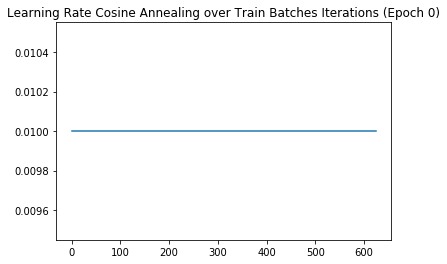

In [ ]:
#Plot the Learning rate
_ = plt.plot(lr[0])
_ = plt.title('LR over Epoch (Epoch 0)')

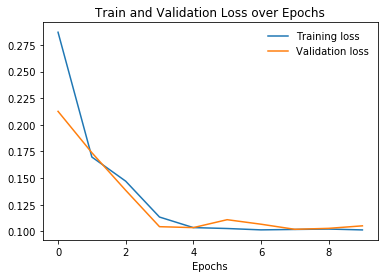

In [ ]:
#inspired from: https://nbviewer.jupyter.org/github/FraPochetti/KagglePlaygrounds/blob/master/NYC%20Taxi%20Fares%20Prediction.ipynb 
# Train VS Validaton Loss

t = [np.mean(tloss[el]) for el in tloss]
v = [np.mean(vloss[el]) for el in vloss]

plt.plot(t, label='Training loss')
plt.plot(v, label='Validation loss')
plt.title("Train VS Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.legend(frameon=False)

# Test 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 0 to 9913
Data columns (total 9 columns):
Hour                 9914 non-null category
AMorPM               9914 non-null category
Weekday              9914 non-null category
pickup_latitude      9914 non-null float64
pickup_longitude     9914 non-null float64
dropoff_latitude     9914 non-null float64
dropoff_longitude    9914 non-null float64
passenger_count      9914 non-null float64
dist_km              9914 non-null float64
dtypes: category(3), float64(6)
memory usage: 572.5 KB


In [ ]:
# divide to cats and conts columns + make them a tensor + to.cuda()

df_test_cats = df_test[['Hour', 'AMorPM', 'Weekday']]
test_cats = df_test_cats.astype(np.int64)
test_cats = torch.tensor(test_cats.values).cuda()

df_test_conts = df_test[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']]
test_conts = df_test_conts.astype(np.float32)
test_conts = torch.tensor(test_conts.values).cuda()

In [ ]:
# make prediction

with torch.no_grad():
    model.eval()
    output = model.forward(test_cats,test_conts).cuda()

In [ ]:
output

tensor([2.2710, 2.3483, 1.7619,  ..., 3.9787, 3.0327, 1.5780], device='cuda:0')

In [ ]:
len(output)

9914

In [ ]:
type(output)

torch.Tensor

In [ ]:
# convert to numpy array
np_output = output.cpu().numpy()

In [ ]:
type(np_output)

numpy.ndarray

In [ ]:
np_output

array([2.2710056, 2.348294 , 1.7618616, ..., 3.9786932, 3.032723 ,
       1.5780466], dtype=float32)

In [ ]:
#  exp to the output data

np_output_exp = np.exp(np_output)

In [ ]:
np_output_exp

array([ 9.689139 , 10.467697 ,  5.8232675, ..., 53.447147 , 20.753668 ,
        4.8454814], dtype=float32)

In [ ]:
# CONVERT to pandas data frame 

df_output =  pd.DataFrame(np_output_exp)

In [ ]:
df_output

,0
0,9.689139
1,10.467697
2,5.823267
3,6.496717
4,15.717172
...,...
9909,6.708517
9910,10.375310
9911,53.447147
9912,20.753668
